In [1]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [2]:
# load the dataset
Data_folder_path = "C:/Users/geofr/Desktop/Research/Data/FE/DWM/"

dset = analysis.load_Dataset(Data_folder_path + r'BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.000001,0.000001,2,4.000000e-08,1.000000e-08,30,0,0,1000,1,1.100000e-08,-2.578125e-07,0,0.080402,0.0,0,0,fe_DWM__0.csv
1,0.000001,0.000001,2,4.000000e-08,1.000000e-08,30,0,0,22000,1,5.000000e-10,-2.578125e-07,0,0.080402,0.0,0,0,fe_DWM__1.csv


In [3]:
data2= dset.select_index(1).get_data()

IndexError: arrays used as indices must be of integer (or boolean) type

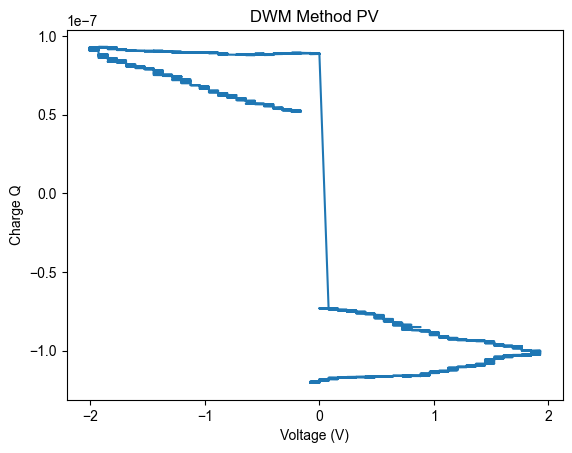

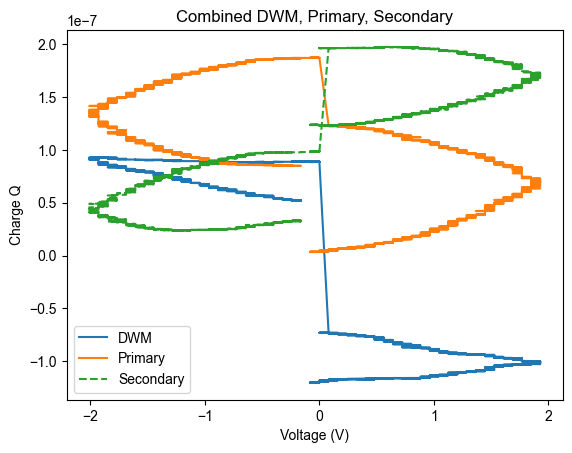

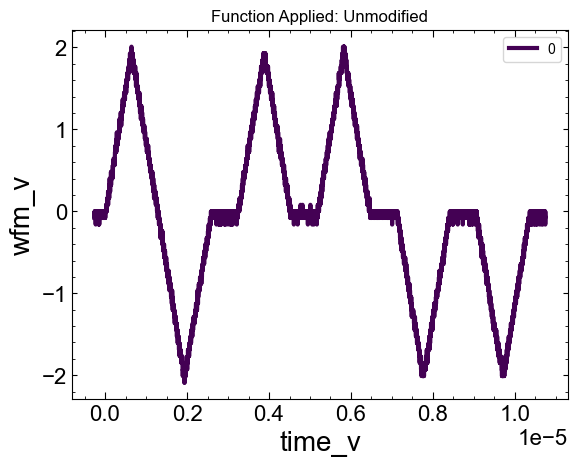

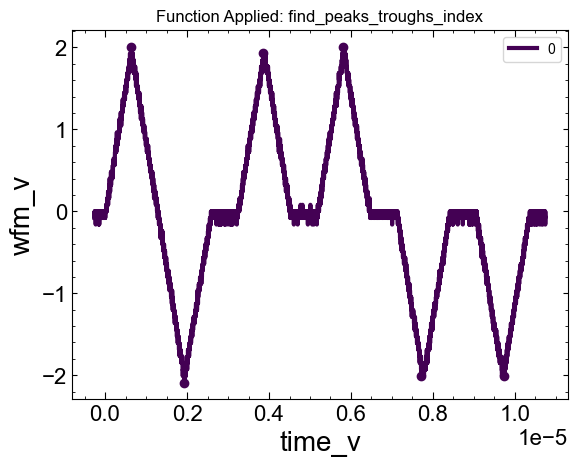

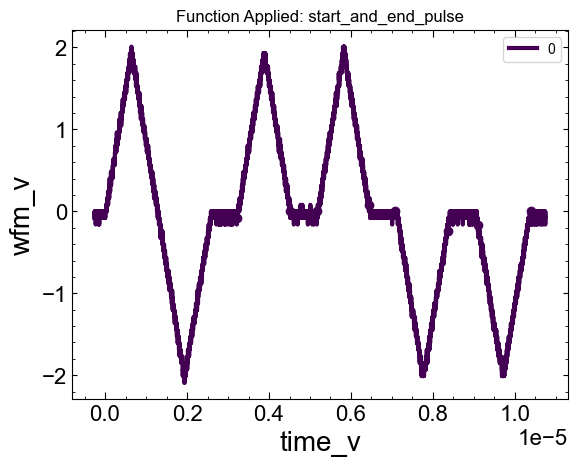

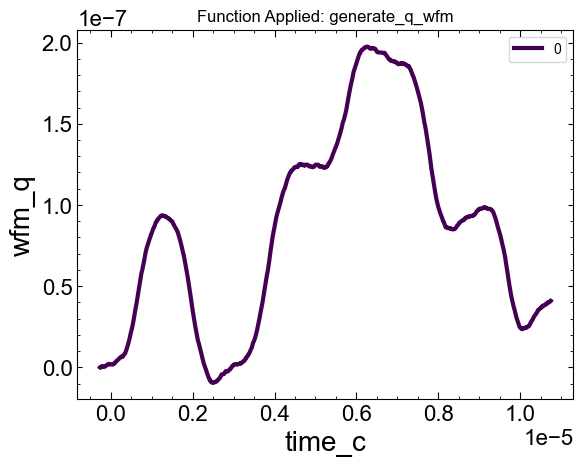

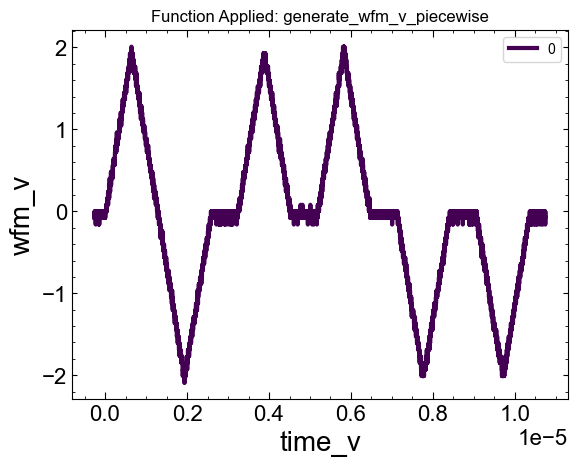

In [4]:
modified_data, interm_steps = use_analysis_file('analysisfile', data2, verbose=True, dont_pass_defn=True)

In [15]:
def find_peaks_troughs_index(data_dict)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v']
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8)
    all_peaks = np.concatenate((peaks, troughs), axis=0)
    data_dict['peaks'] = np.sort(all_peaks)
    return data_dict

In [16]:
data2.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c']

In [17]:
len(data2['wfm_v'])

22000

In [20]:

arr = data2['wfm_v']
arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
distance_between_peaks = len(arr)/10
peaks, _ = find_peaks(arr_normalized, height=0.95, distance=distance_between_peaks)
troughs, _ = find_peaks(-1*arr_normalized, height=0.95, distance=distance_between_peaks)
all_peaks = np.concatenate((peaks, troughs), axis=0)
all_peaks

array([ 1805,  8237, 12126,  4383, 15953, 19993], dtype=int64)

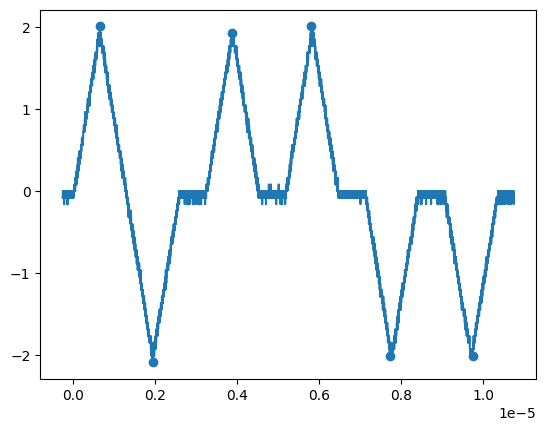

In [21]:
plt.plot(data2['time_v'], data2['wfm_v'])
plt.scatter(data2['time_v'][all_peaks], data2['wfm_v'][all_peaks])

Text(0, 0.5, 'yey')

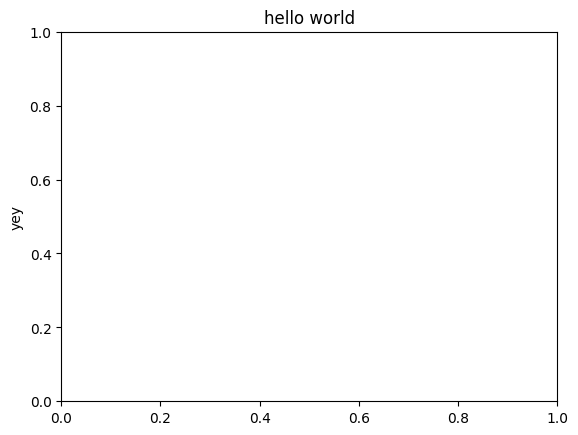

In [7]:
fig, ax = plt.subplots()
ax.set_title("hello world")
ax.set_ylabel("yey")